In [27]:
# 2019/08/23
# Chih-Hsiang Wang

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [29]:
np.random.seed(0)

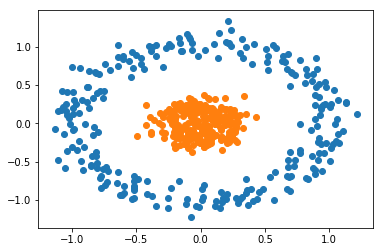

In [30]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
# print(X) 
# print(y)
 
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 0s 599us/step - loss: 0.6962 - acc: 0.5140
Epoch 2/100
500/500 [==============================] - 0s 57us/step - loss: 0.6938 - acc: 0.6180
Epoch 3/100
500/500 [==============================] - 0s 56us/step - loss: 0.6926 - acc: 0.5160
Epoch 4/100
500/500 [==============================] - 0s 61us/step - loss: 0.6916 - acc: 0.6760
Epoch 5/100
500/500 [==============================] - 0s 55us/step - loss: 0.6905 - acc: 0.6340
Epoch 6/100
500/500 [==============================] - 0s 60us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 58us/step - loss: 0.6866 - acc: 0.6500
Epoch 8/100
500/500 [==============================] - 0s 52us/step - loss: 0.6839 - acc: 0.6720
Epoch 9/100
500/500 [==============================] - 0s 58us/step - loss: 0.6796 - acc: 0.7600
Epoch 10/100
500/500 [==============================] - 0s 52us/step - loss: 0.6734 - acc: 0.7980
Epoch 11/100
500/500 [======

In [ ]:
plt.plot(h.history['acc'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
 
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [ ]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
 
x = 0
y = 0.75
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='x', markersize=10, color="red")
print("Prediction is: ", predict)